# Hurricane Damage Prediction Using CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
import glob


training data

In [143]:
damage = glob.glob("train_another/damage/*.jpeg")

In [144]:
no_damage = glob.glob("train_another/no_damage/*.jpeg")

testing data

In [145]:
damage_test = glob.glob("test_another/damage/*.jpeg")

In [146]:
no_damage_test = glob.glob("test_another/no_damage/*.jpeg")

In [147]:
print(f"No.of images in training set are \ndamage:{len(damage)} \nno_damage:{len(no_damage)}")

No.of images in training set are 
damage:1983 
no_damage:1984


In [148]:
print(f"No.of images in testing set are \ndamage:{len(damage_test)} \nno_damage:{len(no_damage_test)}")

No.of images in testing set are 
damage:1704 
no_damage:1000


In [149]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [150]:
label_dict = {0:'damage',1:'no_damage'}

In [151]:
len(image)

3967

In [152]:
image_test = []
label_test = []

for i in damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in no_damage_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [153]:
image , label = shuffle(image , label, random_state= 100)

In [154]:
len(image)

3967

In [155]:
image_test , label_test = shuffle(image_test , label_test, random_state= 100)

In [156]:
len(image_test)

2704

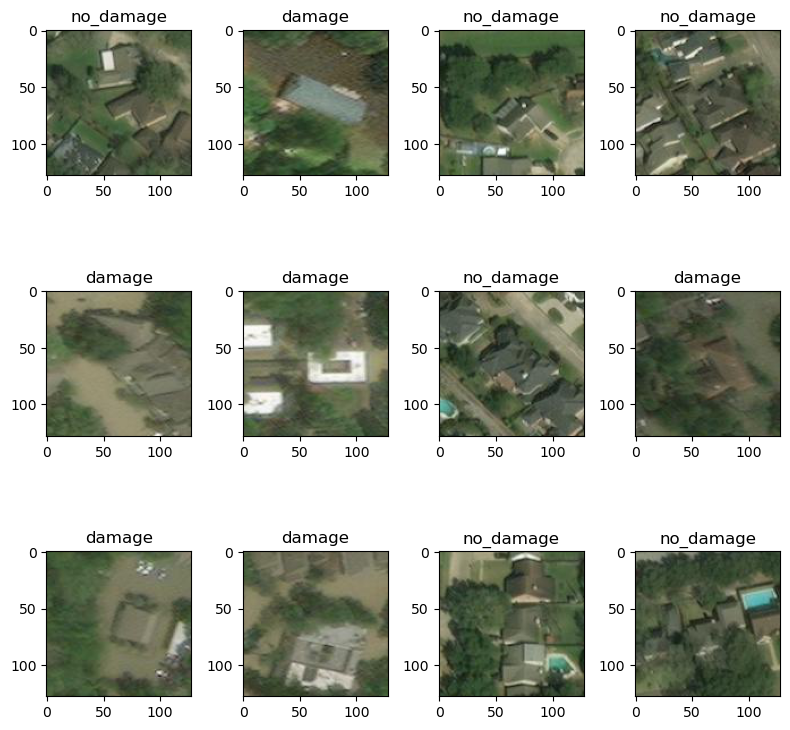

In [157]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_dict[label[i]])
plt.tight_layout()

In [158]:
images = image[:10]

for i in images:
    print(i.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [159]:
X_train = []

for i in image:
    X_train.append(resize(i, (140,140,3)))

In [160]:
X_test = []

for i in image_test:
    X_test.append(resize(i, (140,140,3)))

In [161]:
X_train = np.array(X_train)
X_test = np.array(X_test)
    

In [162]:
X_test.shape

(2704, 140, 140, 3)

In [163]:
y_train = np.array(label)
y_test = np.array(label_test)

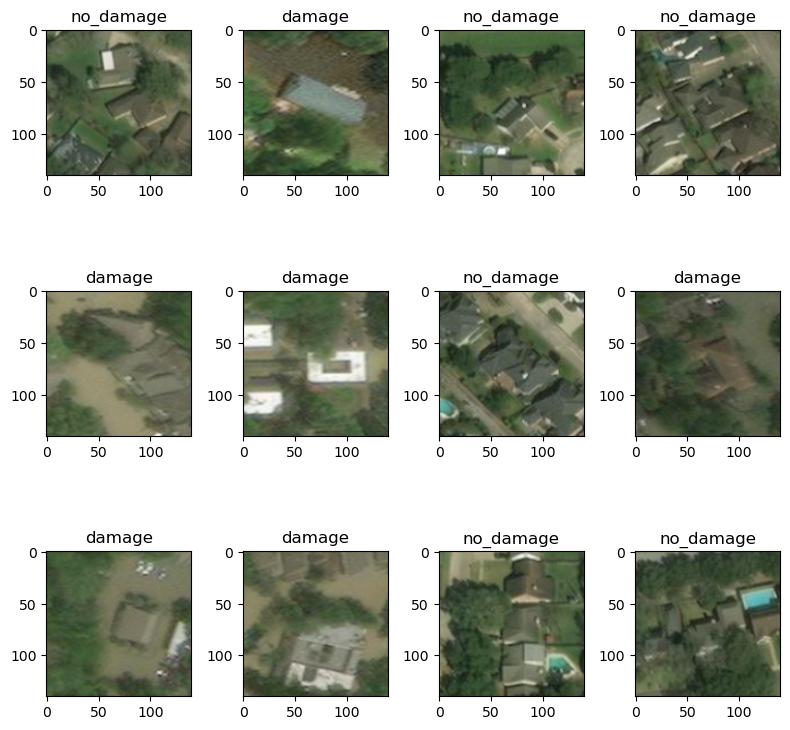

In [164]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(label_dict[y_train[i]])
plt.tight_layout()

In [165]:
print(f"Shape of X_train is:{X_train.shape}\nShape of X_test is:{X_test.shape}\nShape of y_train is:{y_train.shape}\nShape of y_test is:{y_test.shape}")

Shape of X_train is:(3967, 140, 140, 3)
Shape of X_test is:(2704, 140, 140, 3)
Shape of y_train is:(3967,)
Shape of y_test is:(2704,)


In [166]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (140,140,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

In [167]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [168]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 138, 138, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 69, 69, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 67, 67, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 33, 33, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 64)       

In [169]:
model.fit(X_train,y_train,epochs= 5,validation_split=0.05)

Epoch 1/5
118/118 [==============================] - 57s 457ms/step - loss: 0.6335 - accuracy: 0.6359 - val_loss: 0.6333 - val_accuracy: 0.6030
Epoch 2/5
118/118 [==============================] - 52s 440ms/step - loss: 0.4741 - accuracy: 0.7834 - val_loss: 0.2973 - val_accuracy: 0.9146
Epoch 3/5
118/118 [==============================] - 53s 447ms/step - loss: 0.3860 - accuracy: 0.8336 - val_loss: 0.2171 - val_accuracy: 0.9296
Epoch 4/5
118/118 [==============================] - 52s 441ms/step - loss: 0.2695 - accuracy: 0.8957 - val_loss: 0.1596 - val_accuracy: 0.9548
Epoch 5/5
118/118 [==============================] - 52s 445ms/step - loss: 0.2299 - accuracy: 0.9116 - val_loss: 0.1374 - val_accuracy: 0.9648


In [170]:
model.evaluate(X_train,y_train)

124/124 [==============================] - 15s 122ms/step - loss: 0.1640 - accuracy: 0.9420


[0.1639995276927948, 0.9420216679573059]

In [171]:
predict = model.predict(X_test)

85/85 [==============================] - 13s 121ms/step


In [172]:
predict[0]

array([8.6406893e-01, 9.9807602e-01, 6.8106368e-05, 5.5094215e-04],
      dtype=float32)

In [173]:
y_pred  = [np.argmax(i) for i in predict]

In [174]:
y_pred[:5]

[1, 0, 1, 1, 0]

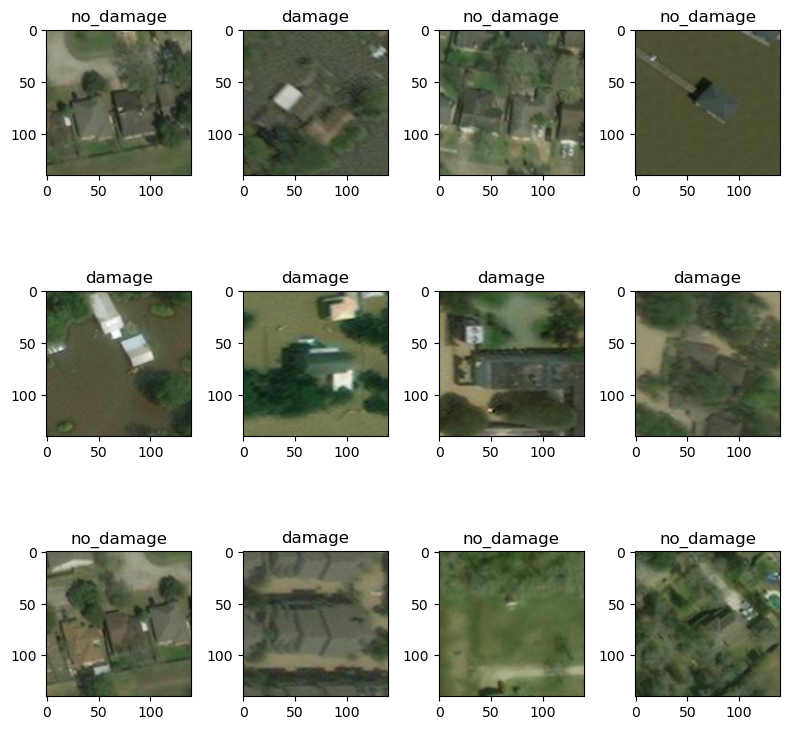

In [175]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[y_pred[i]])
plt.tight_layout()

In [176]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<Axes: >

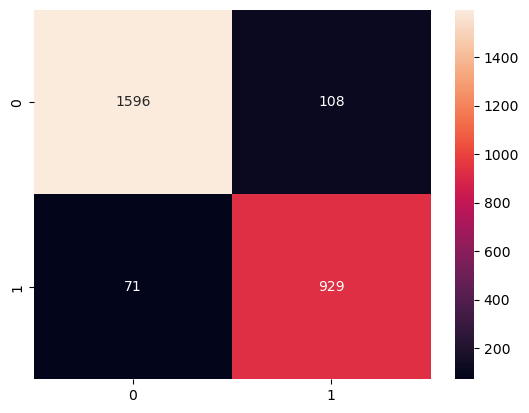

In [178]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [179]:
accuracy_score(y_test,y_pred)

0.933801775147929

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1704
           1       0.90      0.93      0.91      1000

    accuracy                           0.93      2704
   macro avg       0.93      0.93      0.93      2704
weighted avg       0.93      0.93      0.93      2704

